In [1]:
import scipy
from scipy.stats import norm, bernoulli, binom, poisson
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
pHat = ((500+550)/2000)
z = ((500/1000)-(550/1000))/np.sqrt((pHat*(1-pHat)) * (1/1000+1/1000))
print(z)
p = .01
p = norm.cdf(z)
print(p)

-2.238868314198227
0.012582242850159199


*
H0: There is no difference between A and B 

Ha: B is a better logo than A

p > 1%: cannot reject the null hypothesis at this significance level

p > 5%: can reject the null hypothesis at this significance level 
* 

*
Moving on to Part 2: Regression of real estate data
*

In [3]:
csv1 = pd.read_csv('realEstate1.csv')
csv2 = pd.read_csv('realEstate2.csv')
combinedCSV = pd.concat([csv1, csv2])

In [4]:
filterByListPrice = combinedCSV[(combinedCSV['LstPrice'] <= 1000000) & (combinedCSV['LstPrice'] >= 200000)]
filterByListPrice['LstPrice']

0      725000
1      205000
2      390000
3      445000
5      339000
6      600000
7      209900
9      399900
10     450000
12     300000
13     489900
16     359500
17     225000
18     359000
19     229000
22     475000
24     200000
25     499900
26     349000
29     375000
31     399000
32     619900
33     499000
34     589900
35     319900
36     250000
37     200000
38     499000
39     640000
40     269900
        ...  
102    289000
103    269000
106    850000
107    649900
108    315000
109    599999
110    399900
112    519000
113    814900
114    449000
117    665900
118    399000
119    850000
122    995000
126    405000
127    229000
128    408500
130    779000
131    269000
134    249000
135    350000
136    849000
137    379000
138    533800
142    549000
143    995000
144    349999
145    249900
146    330000
147    385000
Name: LstPrice, Length: 263, dtype: int64

In [5]:
relevantData = filterByListPrice[['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]
relevantData.dtypes

Acres        float64
Deck           int64
GaragCap       int64
Latitude     float64
Longitude    float64
LstPrice       int64
Patio          int64
PkgSpacs       int64
PropType      object
SoldPrice      int64
Taxes          int64
TotBed       float64
TotBth       float64
TotSqf        object
YearBlt        int64
dtype: object

In [6]:
#replacing the comma's with '' and then converting each to an integer
relevantData['TotSqf'] = relevantData['TotSqf'].map(lambda x: int(x.replace(",", "")))
#mapping the property type to 0 if it's a townhouse or condo and 1 if it's a SingleFamily Home
relevantData.reset_index(inplace=True)
relevantData['Prop_Type_num'] = relevantData['PropType'].map({'Condo': 0, 'Townhouse': 0, 'Single Family': 1})
relevantData.dtypes

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


index              int64
Acres            float64
Deck               int64
GaragCap           int64
Latitude         float64
Longitude        float64
LstPrice           int64
Patio              int64
PkgSpacs           int64
PropType          object
SoldPrice          int64
Taxes              int64
TotBed           float64
TotBth           float64
TotSqf             int64
YearBlt            int64
Prop_Type_num      int64
dtype: object

In [7]:
#cleaning the data to exclude values where the Longitude is equal to 0 
relevantData = relevantData.drop(relevantData[(relevantData['Longitude'] == 0)].index)
#cleaning the data to exclude values where the taxes are above 50000
relevantData = relevantData.drop(relevantData[(relevantData["Taxes"] > 50000)].index)

In [8]:
#indexing was off, so reset the index here to match the data frame 
relevantData.reset_index(inplace=True)
relevantData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 18 columns):
level_0          260 non-null int64
index            260 non-null int64
Acres            260 non-null float64
Deck             260 non-null int64
GaragCap         260 non-null int64
Latitude         260 non-null float64
Longitude        260 non-null float64
LstPrice         260 non-null int64
Patio            260 non-null int64
PkgSpacs         260 non-null int64
PropType         260 non-null object
SoldPrice        260 non-null int64
Taxes            260 non-null int64
TotBed           260 non-null float64
TotBth           260 non-null float64
TotSqf           260 non-null int64
YearBlt          260 non-null int64
Prop_Type_num    260 non-null int64
dtypes: float64(5), int64(12), object(1)
memory usage: 36.6+ KB


*There are 258 entries with home values within the following range: $200,000 and $1,000,000
I've gotten rid of any entries with a longitude that did not make sense as well as the data points where the taxes seemed unreasonable (above $50k). 
*

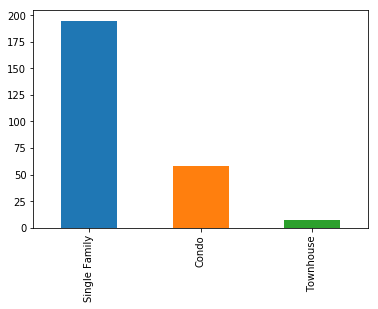

In [9]:
#grab the values of the property types and plot them in a bar graph
barChart = relevantData.PropType.value_counts().plot('bar')
barChart

['level_0', 'index', 'Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt', 'Prop_Type_num']


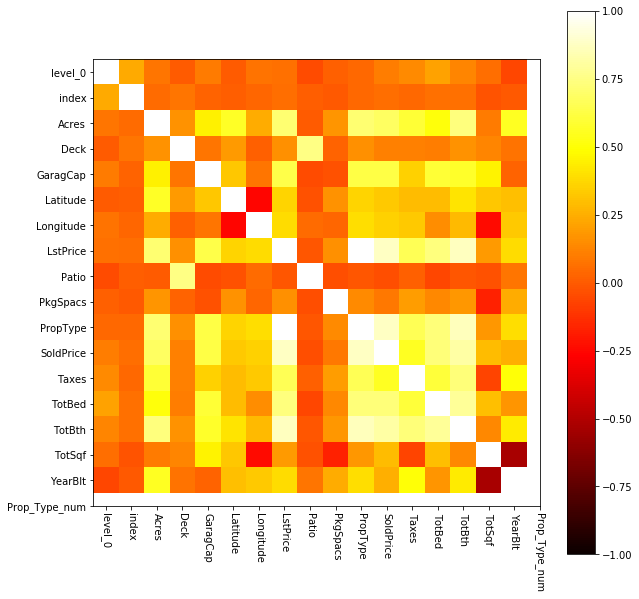

In [10]:
plt.figure(figsize=(10, 10))
correlationMatrix = relevantData.corr()
im = plt.imshow(correlationMatrix, cmap="hot", vmin=-1, vmax=1)
colorBar = plt.colorbar(im)
myList = list(relevantData)
print(myList)
# locs, labels = xticks()
plt.xticks(np.arange(len(myList)), myList, rotation=270)
plt.yticks(np.arange(len(myList)), myList, rotation=0)
colorBar

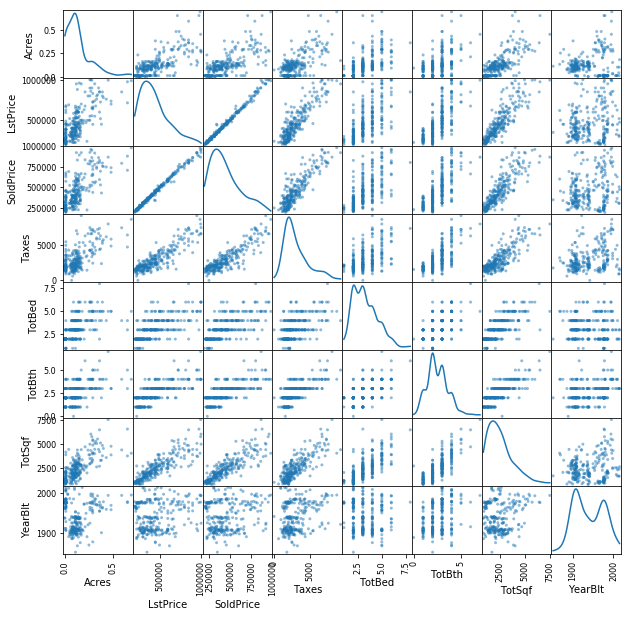

In [11]:
scatterData = relevantData[['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]
pd.plotting.scatter_matrix(scatterData, figsize=(10, 10), diagonal='kde')
plt.show()

*
List price seems to be correlated with the sold price, total square feet, and taxes. 
Sold price seems to be correlated with total square feet, list price, taxes, and somewhat related to acres.
Total bed and total bath do not seem to have much correlation with the rest of the data. 
*

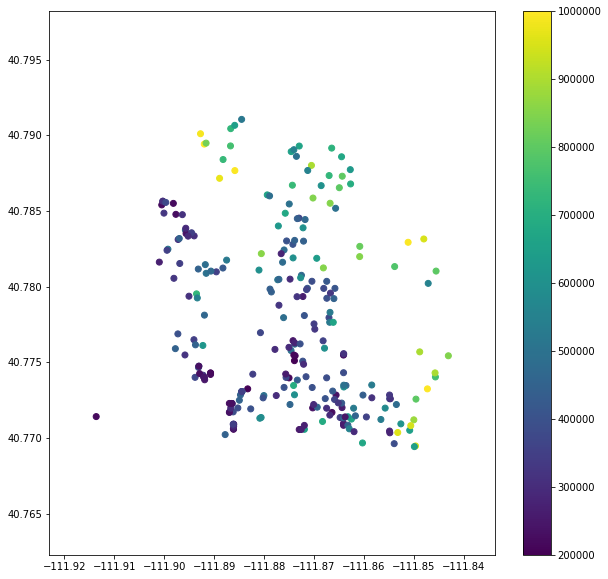

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(relevantData.Longitude, relevantData.Latitude, c = relevantData["LstPrice"])
plt.colorbar()
plt.show()

*
There is a fairly clear divide in home prices as you look along the east side and to the north. I'd assume this is in Capital Hill and along the mountains. There are a couple locations on the West Side that appear to have a higher value, I'd guess this is in West Shire, etc. 
*

In [13]:
soldToList = sm.ols(formula="SoldPrice ~ LstPrice", data=relevantData).fit()
soldToList.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.611e+04
Date:                Tue, 29 May 2018   Prob (F-statistic):          2.97e-261
Time:                        16:37:42   Log-Likelihood:                -2927.2
No. Observations:                 260   AIC:                             5858.
Df Residuals:                     258   BIC:                             5866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.317e+04   2948.953      4.465      0.000    7361.378     1.9e+04
LstPrice       0.9441      0.006    161.593      0.000       0.933       0.956
==============================================================================
Omnibus:                      123.259   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.446
Skew:                          -1.750   Prob(JB):                    3.95e-192
Kurtosis:                      11.313   Cond. No.                     1.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*
The high R^2 value of .99 shows a high correlation between list price and sold price. This doesn't imply causation, but it does show strong correlation.

The B1 correlates with the list price coefficient which is around .94. The initial value of B0 at around $13,000 means that the sold price is about $13,000 + .94 * listPrice. There is close to a 1:1 ratio for list price vs sale price.  
*

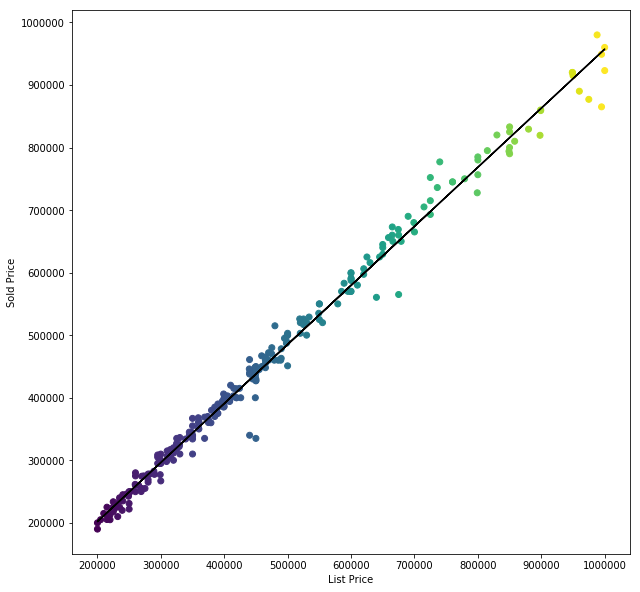

In [14]:
plt.figure(figsize=(10, 10))
plt.xlabel('List Price')
plt.ylabel('Sold Price')
plt.scatter(x=relevantData.LstPrice, y = relevantData['SoldPrice'], c = relevantData.LstPrice)
plt.plot(relevantData.LstPrice, soldToList.predict(), c = 'black')

In [15]:
nextBestComparitors = sm.ols('SoldPrice ~ Acres + TotSqf + Taxes + GaragCap + TotBed + TotBth + Latitude + Longitude', data=relevantData).fit()
nextBestComparitors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     179.8
Date:                Tue, 29 May 2018   Prob (F-statistic):           2.56e-99
Time:                        16:37:42   Log-Likelihood:                -3280.9
No. Observations:                 260   AIC:                             6580.
Df Residuals:                     251   BIC:                             6612.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.206e+08    4.8e+07      2.514      0.013    2.61e+07    2.15e+08
Acres       8.189e+04   6.69e+04      1.225      0.222   -4.98e+04    2.14e+05
TotSqf        45.2703      9.418      4.807      0.000      26.723      63.818
Taxes         47.2856      5.621      8.413      0.000      36.216      58.355
GaragCap    2.047e+04   6460.726      3.169      0.002    7748.965    3.32e+04
TotBed      1.073e+04   5797.184      1.851      0.065    -688.846    2.21e+04
TotBth      5149.2492   7880.482      0.653      0.514   -1.04e+04    2.07e+04
Latitude    1.458e+06   1.11e+06      1.312      0.191   -7.31e+05    3.65e+06
Longitude   1.608e+06   4.25e+05      3.788      0.000    7.72e+05    2.44e+06
==============================================================================
Omnibus:                       26.499   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.204
Skew:                           0.616   Prob(JB):                     6.85e-10
Kurtosis:                       4.542   Cond. No.                     4.56e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


### Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for TotSqf.

### Estimate the value that each Garage space adds to a house.
A garage may add some value to the home, but only explained my prediction rate by around 0.5% to 1%
### Does latitude or longitude have an impact on house price? Explain.
The location of a home does affect the price,but in a non-predictable manner. One can't say that if you changed your longitude x amount, your home would go up in value. Clearly though from the home price scatterplot and the long/lat, there is a deliniation of the values. 
### If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare?
So far, we can't get any better than the list price; however, we can use some of the information to help us. 

# Section 7: Incorporating a categorical variable

In [16]:
propertyTypePrediction = sm.ols('SoldPrice ~ PropType', data=relevantData).fit()
propertyTypePrediction.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     25.20
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.01e-10
Time:                        16:37:42   Log-Likelihood:                -3505.5
No. Observations:                 260   AIC:                             7017.
Df Residuals:                     257   BIC:                             7028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  3.092e+05   2.29e+04     13.496      0.000    2.64e+05    3.54e+05
PropType[T.Single Family]  1.848e+05   2.61e+04      7.083      0.000    1.33e+05    2.36e+05
PropType[T.Townhouse]      1.096e+05   6.98e+04      1.571      0.118   -2.78e+04    2.47e+05
==============================================================================
Omnibus:                       23.944   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.680
Skew:                           0.814   Prob(JB):                     5.92e-07
Kurtosis:                       2.987   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
propSqFtPrediction = sm.ols('SoldPrice ~ PropType + TotSqf', data=relevantData).fit()
propSqFtPrediction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     243.9
Date:                Tue, 29 May 2018   Prob (F-statistic):           9.83e-75
Time:                        16:37:42   Log-Likelihood:                -3353.2
No. Observations:                 260   AIC:                             6714.
Df Residuals:                     256   BIC:                             6729.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1.144e+05   1.52e+04      7.547      0.000    8.46e+04    1.44e+05
PropType[T.Single Family]  1.276e+04   1.62e+04      0.785      0.433   -1.92e+04    4.47e+04
PropType[T.Townhouse]      2682.7755   3.92e+04      0.068      0.945   -7.45e+04    7.99e+04
TotSqf                      131.8569      5.525     23.867      0.000     120.977     142.737
==============================================================================
Omnibus:                       37.579   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.345
Skew:                           0.775   Prob(JB):                     8.75e-16
Kurtosis:                       5.000   Cond. No.                     1.82e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
cprice = relevantData[relevantData['Prop_Type_num'] == 0]['SoldPrice']
condo = relevantData[relevantData['Prop_Type_num'] == 0]['TotSqf']

sfhPrice = relevantData[relevantData['Prop_Type_num'] > 0]['SoldPrice']
# display(sfhPrice)
sfh = relevantData[relevantData['Prop_Type_num'] > 0]['TotSqf']


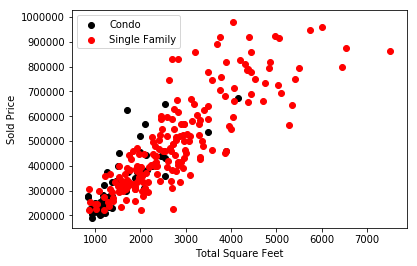

In [19]:
plt.scatter(x=condo, y=cprice, c='black', label='Condo')
plt.scatter(x=sfh, y=sfhPrice, c='red', label='Single Family')
plt.xlabel('Total Square Feet')
plt.ylabel('Sold Price')
plt.legend()
plt.show()